In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
structures = pd.read_feather('../data/structures.feather')

In [137]:
labelled = pd.read_feather('../data/train.feather')

In [138]:
for d in ['x', 'y', 'z']:
    structures[f'{d}_mean'] = structures.groupby('molecule_name')[d].transform("mean")

In [139]:
structures['dist_to_mean'] = pd.Series(np.linalg.norm(structures[['x', 'y', 'z']].values - structures[['x_mean', 'y_mean', 'z_mean']].values, axis=1), index=structures.index)

In [140]:
def make_atom_count_column(df, column_name, atoms=None):
    if atoms is None:
        s = df.groupby('molecule_name').atom.count().astype('int8')
    else:
        sel = None
        for atom in atoms:
            if sel is None:
                sel = df.atom == atom
            else:
                sel = sel | (df.atom == atom)

        s = df[sel].groupby('molecule_name').atom.count().astype('int8')
        
    s.name = column_name
    return df.merge(s, left_on=['molecule_name'], right_index=True)        

In [161]:
molecules = structures[['molecule_name', 'atom']].copy()

for col_name, atoms in [
  ('nC', ['C']),
  ('nF', ['F']),
  ('nH', ['H']),
  ('nN', ['N']),
  ('nO', ['O']),
  ('nCNOF', ['C', 'N', 'O', 'F']),
  ('nCN', ['C', 'N']),
  ('nOF', ['O', 'F']),
  ('nAtoms', None)
]:
    molecules = make_atom_count_column(molecules, col_name, atoms)
molecules = molecules.drop(columns=['atom'])
molecules = molecules.groupby('molecule_name').nth(0)

In [162]:
molecules = molecules.reset_index()

In [163]:
molecules.head(32)

,molecule_name,nC,nF,nH,nN,nO,nCNOF,nCN,nOF,nAtoms
0,dsgdb9nsd_000001,1,0,4,0,0,1,1,0,5
1,dsgdb9nsd_000002,0,0,3,1,0,1,1,0,4
2,dsgdb9nsd_000003,0,0,2,0,1,1,0,1,3
3,dsgdb9nsd_000004,2,0,2,0,0,2,2,0,4
4,dsgdb9nsd_000005,1,0,1,1,0,2,2,0,3
5,dsgdb9nsd_000007,2,0,6,0,0,2,2,0,8
6,dsgdb9nsd_000008,1,0,4,0,1,2,1,1,6
7,dsgdb9nsd_000009,3,0,4,0,0,3,3,0,7
8,dsgdb9nsd_000010,2,0,3,1,0,3,3,0,6
9,dsgdb9nsd_000011,2,0,4,0,1,3,2,1,7


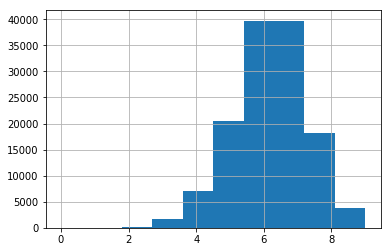

In [167]:
plt.figure()
molecules.nC.hist()
plt.show()

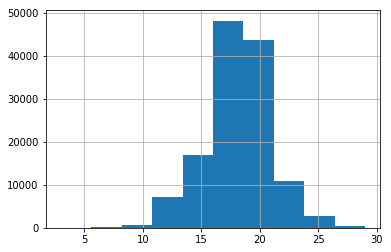

In [168]:
plt.figure()
molecules.nAtoms.hist()
plt.show()

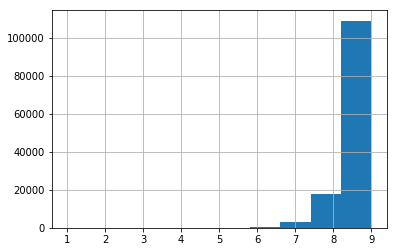

In [170]:
plt.figure()
molecules.nCNOF.hist()
plt.show()

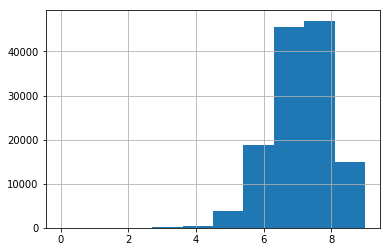

In [171]:
plt.figure()
molecules.nCN.hist()
plt.show()

In [165]:
structures.to_feather('../data/structures_enh.feather')
molecules.to_feather('../data/molecules.feather')